## Firsts steps

Here I was testing data set, ploting waves and testing connecting with google drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
print("Google Drive mounted successfully.")

In [ ]:
from datasets import load_dataset, Dataset, concatenate_datasets
from itertools import islice

# wszystkie (lub wybrane) configi, które chcesz uwzględnić
configs = [
    "mls-tts-bark",
    "mls-tts-chattts",
    "mls-tts-cosyvoice",
    "mls-tts-f5_tts",
    "mls-tts-fish_speech",
    "mls-tts-sparktts",
    "mls-tts-vits",
    "mls-tts-xtts",
    "mls-tts-yourtts",
    "mls-tts-zonos",
    "mls-vocoders-bigvgan",
    "mls-vocoders-bigvsan",
    "mls-vocoders-full_band_melgan",
    "mls-vocoders-hifigan",
    "mls-vocoders-melgan",
    "mls-vocoders-multi_band_melgan",
    "mls-vocoders-parallel_wavegan",
    "mls-vocoders-style_melgan",
    "mls-vocoders-univnet",
    "mls-vocoders-vocos",
]

N_PER_CONFIG = 500   # np. 500 przykładów z każdego configu
parts = []

for cfg in configs:
    print("Sampling from", cfg)
    ds_stream = load_dataset(
        "wqz995/AUDETER",
        cfg,
        split="dev",
        streaming=True,   # czyta strumieniowo z tych wszystkich plików/parquet
    )
    subset = list(islice(ds_stream, N_PER_CONFIG))  # bierze trochę z każdego
    parts.append(Dataset.from_list(subset))

mixed_ds = concatenate_datasets(parts).shuffle(seed=42)
print(mixed_ds)


Sampling from mls-tts-bark


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Sampling from mls-tts-chattts
Sampling from mls-tts-cosyvoice
Sampling from mls-tts-f5_tts


KeyboardInterrupt: 

In [ ]:
!pip install -U "datasets[audio]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 30.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
from datasets import Dataset, concatenate_datasets
from datasets import load_dataset
from itertools import islice
import os

base_dir = "/content/drive/MyDrive/audeter_chunks1"
os.makedirs(base_dir, exist_ok=True)

configs = ["mls-tts-bark", "mls-tts-chattts"]  # przykładowo
N_PER_CONFIG = 1000          # ile łącznie chcesz z configu
CHUNK_SIZE = 1000            # ile na jeden plik na dysku

for cfg in configs:
    print("Sampling from", cfg)
    ds_stream = load_dataset(
        "wqz995/AUDETER",
        cfg,
        split="dev",
        streaming=True,
    ).decode(False)          # bez dekodowania audio

    buf = []
    taken = 0
    shard_id = 0

    for ex in ds_stream:
        buf.append(ex)
        taken += 1

        # jeśli bufor pełny -> zapis na dysk i wyczyszczenie RAM
        if len(buf) == CHUNK_SIZE:
            shard = Dataset.from_list(buf)
            shard_path = f"{base_dir}/{cfg}_shard_{shard_id}"
            shard.save_to_disk(shard_path)
            print("saved", shard_path, "size", len(shard))
            shard_id += 1
            buf = []  # czyścimy pamięć

        if taken >= N_PER_CONFIG:
            break

    # zapis końcówki, jeśli coś zostało
    if buf:
        shard = Dataset.from_list(buf)
        shard_path = f"{base_dir}/{cfg}_shard_{shard_id}"
        shard.save_to_disk(shard_path)
        print("saved", shard_path, "size", len(shard))


Sampling from mls-tts-bark


Saving the dataset (0/3 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

saved /content/drive/MyDrive/audeter_chunks1/mls-tts-bark_shard_0 size 1000
Sampling from mls-tts-chattts


Saving the dataset (0/2 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

saved /content/drive/MyDrive/audeter_chunks1/mls-tts-chattts_shard_0 size 1000


In [ ]:
from datasets import load_dataset

ds = load_dataset(
    "wqz995/AUDETER",
    "mls-tts-bark",
    split="dev[:100]"   # tylko 100 przykładów, bez streamingu
)
print(ds[0])

mls/tts/bark/dev/v0.tar:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

mls/tts/bark/test/v0.tar:   0%|          | 0.00/4.77G [00:00<?, ?B/s]

Generating dev split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

{'wav': <datasets.features._torchcodec.AudioDecoder object at 0x7e01c415c6b0>, '__key__': 'dev/1055_0', '__url__': '/root/.cache/huggingface/hub/datasets--wqz995--AUDETER/snapshots/87eef4ac6eb8a6c819c3b230d6fcc176482d3a22/mls/tts/bark/dev/v0.tar'}


In [ ]:
ex = ds[0]
print(type(ex["wav"]))
print(ex["wav"])

<class 'datasets.features._torchcodec.AudioDecoder'>


In [ ]:
from datasets import Audio

# jeśli już masz ds (np. po load_dataset albo load_from_disk)
ds = ds.cast_column("wav", Audio())   # wymusza dekodowanie audio


In [ ]:
print(ds[0])

{'wav': <datasets.features._torchcodec.AudioDecoder object at 0x7e00816ba960>, '__key__': 'dev/1055_0', '__url__': 'hf://datasets/wqz995/AUDETER@87eef4ac6eb8a6c819c3b230d6fcc176482d3a22/mls/tts/bark/dev/v0.tar'}


In [ ]:
ex = ds[0]
print(ex["wav"])

In [ ]:
ds = ds.cast_column("wav", Audio(sampling_rate=22050))
ds[0]

{'wav': <datasets.features._torchcodec.AudioDecoder at 0x7e01c4129a00>,
 '__key__': 'dev/1055_0',
 '__url__': '/root/.cache/huggingface/hub/datasets--wqz995--AUDETER/snapshots/87eef4ac6eb8a6c819c3b230d6fcc176482d3a22/mls/tts/bark/dev/v0.tar'}

In [ ]:
print(waveform.data.numpy())

[[0.01675634 0.01844577 0.02257859 ... 0.00112642 0.00150142 0.00131892]]


In [ ]:
ex = ds[0]

audio_obj = ex['wav']

meta = audio_obj.metadata
print(meta)



AudioStreamMetadata:
  duration_seconds_from_header: 13.16
  begin_stream_seconds_from_header: None
  bit_rate: 768000.0
  codec: pcm_f32le
  stream_index: 0
  sample_rate: 24000
  num_channels: 1
  sample_format: flt



In [ ]:
waveform = audio_obj.get_all_samples()
print(waveform)



AudioSamples:
  data (shape): torch.Size([1, 290178])
  pts_seconds: 0.0
  duration_seconds: 13.16
  sample_rate: 22050



dupa1
dupa2


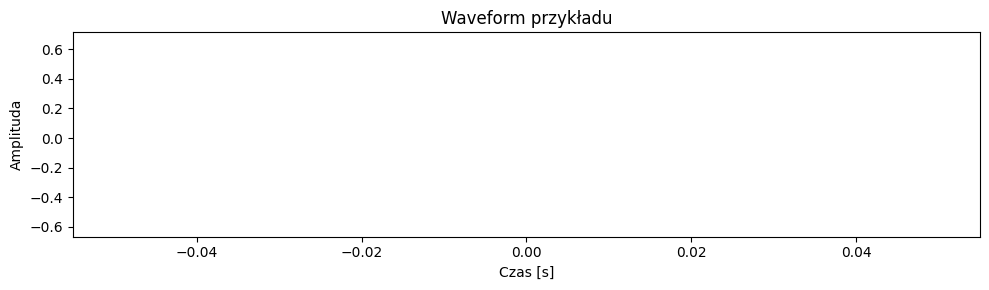

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# załóżmy, że ex jest jednym elementem datasetu
ex = ds[0]

# jeśli masz audio już jako tensor:
waveform = audio_obj.get_all_samples().data
print("dupa1")
# jeśli to torch.Tensor, zamień na numpy:
if isinstance(waveform, torch.Tensor):
    waveform = waveform.cpu().numpy()[:2]
print("dupa2")

sr = 24000  # lub ex["sample_rate"], jeśli masz w metadanych

t = np.linspace(0, len(waveform) / sr, num=len(waveform))

plt.figure(figsize=(10, 3))
plt.plot(t, waveform)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.title("Waveform przykładu")
plt.tight_layout()
plt.show()

In [ ]:
waveform.shape[1]

290178

In [ ]:
sr = 24000
t = np.linspace(0, waveform.shape[1] / sr, num=waveform.shape[1])
print(t.shape)

(290178,)


In [ ]:
wave_cp = waveform.copy()
wave_cp = wave_cp.flatten()
print(wave_cp.shape)

(290178,)


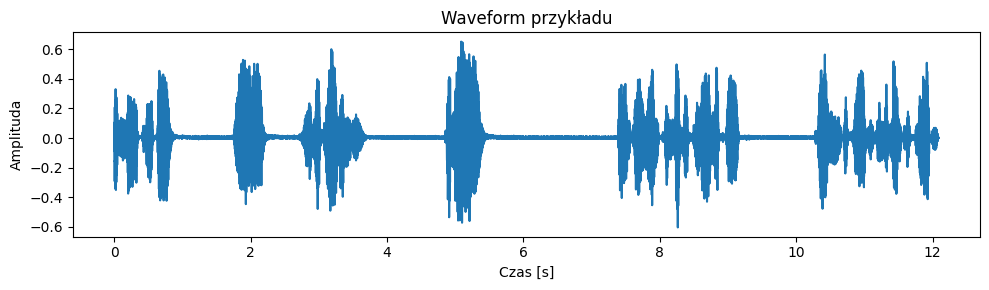

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(t, wave_cp)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.title("Waveform przykładu")
plt.tight_layout()
plt.show()

In [ ]:
mount

In [ ]:
from datasets import load_from_disk, Audio
ds = load_from_disk("/content/drive/MyDrive/audeter_chunks1/mls-tts-bark_shard_0")
ds = ds.cast_column("wav", Audio())

In [ ]:
ex = ds[4]
audio_obj = ex['wav']
meta = audio_obj.metadata
print(meta)

AudioStreamMetadata:
  duration_seconds_from_header: 10.32
  begin_stream_seconds_from_header: None
  bit_rate: 768000.0
  codec: pcm_f32le
  stream_index: 0
  sample_rate: 24000
  num_channels: 1
  sample_format: flt



In [ ]:
waveform = audio_obj.get_all_samples()
print(waveform)

AudioSamples:
  data (shape): torch.Size([1, 247680])
  pts_seconds: 0.0
  duration_seconds: 10.32
  sample_rate: 24000



In [ ]:
wave = waveform.data.numpy()
sr = waveform.sample_rate
print(wave.shape)

(1, 247680)


In [ ]:
t = np.linspace(0, wave.shape[1] / sr, num=wave.shape[1])
print(t.shape)

(247680,)


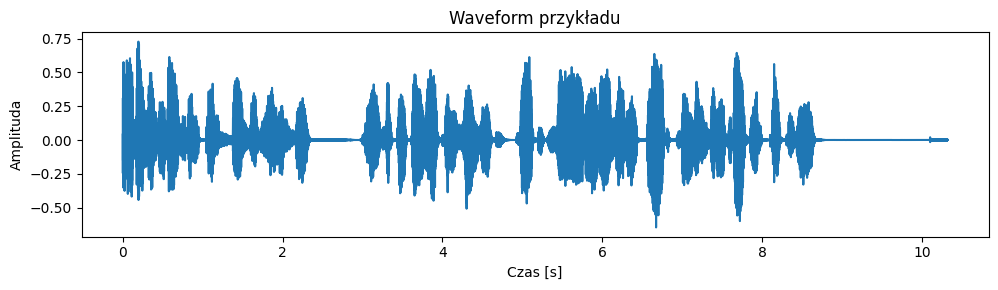

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(t, wave.flatten())
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.title("Waveform przykładu")
plt.tight_layout()
plt.show()

In [ ]:
print(len(ds))

1000


In [ ]:
ds1 = load_from_disk('/content/drive/MyDrive/audeter_chunks1/mls-tts-chattts_shard_0')
ds1 = ds1.cast_column("wav", Audio())

FileNotFoundError: Directory /content/drive/MyDrive/audeter_chunks1/mls-tts-chattts_shard_0 not found

In [ ]:
print(len(ds1))

1000


In [ ]:
!du -sh /content/drive/MyDrive/audeter_chunks1

du: cannot access '/content/drive/MyDrive/audeter_chunks1': No such file or directory


In [ ]:
configs = [
    "mls-tts-bark",
    "mls-tts-chattts",
    "mls-tts-cosyvoice",
    "mls-tts-f5_tts",
    "mls-tts-fish_speech",
    "mls-tts-sparktts",
    "mls-tts-vits",
    "mls-tts-xtts",
    "mls-tts-yourtts",
    "mls-tts-zonos",
    "mls-vocoders-bigvgan",
    "mls-vocoders-bigvsan",
    "mls-vocoders-full_band_melgan",
    "mls-vocoders-hifigan",
    "mls-vocoders-melgan",
    "mls-vocoders-multi_band_melgan",
    "mls-vocoders-parallel_wavegan",
    "mls-vocoders-style_melgan",
    "mls-vocoders-univnet",
    "mls-vocoders-vocos",
]

print(len(configs))

20


In [ ]:
names = """mls-tts-bark
Update parquet files
3 months ago
mls-tts-chattts
Update parquet files
3 months ago
mls-tts-cosyvoice
Update parquet files
3 months ago
mls-tts-f5_tts
Update parquet files
3 months ago
mls-tts-fish_speech
Update parquet files
3 months ago
mls-tts-sparktts
Update parquet files
3 months ago
mls-tts-vits
Update parquet files
3 months ago
mls-tts-xtts
Update parquet files
3 months ago
mls-tts-yourtts
Update parquet files
3 months ago
mls-tts-zonos
Update parquet files
3 months ago
mls-vocoders-bigvgan
Update parquet files
3 months ago
mls-vocoders-bigvsan
Update parquet files
3 months ago
mls-vocoders-full_band_melgan
Update parquet files
3 months ago
mls-vocoders-hifigan
Update parquet files
3 months ago
mls-vocoders-melgan
Update parquet files
3 months ago
mls-vocoders-multi_band_melgan
Update parquet files
3 months ago
mls-vocoders-parallel_wavegan
Update parquet files
3 months ago
mls-vocoders-style_melgan
Update parquet files
3 months ago
mls-vocoders-univnet
Update parquet files
3 months ago
mls-vocoders-vocos
1
2"""

configs_names = [l for l in names.split() if "mls" in l]
print(configs_names)
print(len(configs_names))

['mls-tts-bark', 'mls-tts-chattts', 'mls-tts-cosyvoice', 'mls-tts-f5_tts', 'mls-tts-fish_speech', 'mls-tts-sparktts', 'mls-tts-vits', 'mls-tts-xtts', 'mls-tts-yourtts', 'mls-tts-zonos', 'mls-vocoders-bigvgan', 'mls-vocoders-bigvsan', 'mls-vocoders-full_band_melgan', 'mls-vocoders-hifigan', 'mls-vocoders-melgan', 'mls-vocoders-multi_band_melgan', 'mls-vocoders-parallel_wavegan', 'mls-vocoders-style_melgan', 'mls-vocoders-univnet', 'mls-vocoders-vocos']
20


In [ ]:
from datasets import load_dataset

ds = load_dataset(
    "wqz995/AUDETER",
    "mls-tts-bark",
    split="dev[:100]"   # tylko 100 przykładów, bez streamingu
)


In [ ]:
from datasets import Audio

ds = ds.cast_column("wav", Audio())

In [ ]:
ex = ds[0]
audio_obj = ex['wav'].get_all_samples()
meta = audio_obj.metadata
# print(meta)

ImportError: To support decoding audio data, please install 'torchcodec'.

In [ ]:
!pip install torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00


In [ ]:
import polars as pl

splits = {'dev': 'data/dev-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pl.read_parquet('hf://datasets/parler-tts/mls_eng/' + splits['dev'])


ComputeError: error decoding response: invalid type: map, expected a sequence at line 1 column 0, response value: {"error":"data/dev-00000-of-00001.parquet does not exist on \"main\""}

In [ ]:
df.shape

(3807, 8)

In [ ]:
from pathlib import Path

file = 'hf://datasets/parler-tts/mls_eng/'

Path(file).exists()

False

In [ ]:
ex = df[0]

print(ex)

shape: (1, 8)
┌────────────┬────────────┬────────────┬──────────┬────────────┬────────────┬────────────┬─────────┐
│ audio      ┆ original_p ┆ begin_time ┆ end_time ┆ transcript ┆ audio_dura ┆ speaker_id ┆ book_id │
│ ---        ┆ ath        ┆ ---        ┆ ---      ┆ ---        ┆ tion       ┆ ---        ┆ ---     │
│ struct[2]  ┆ ---        ┆ f64        ┆ f64      ┆ str        ┆ ---        ┆ str        ┆ str     │
│            ┆ str        ┆            ┆          ┆            ┆ f64        ┆            ┆         │
╞════════════╪════════════╪════════════╪══════════╪════════════╪════════════╪════════════╪═════════╡
│ {b"OggS\x0 ┆ http://www ┆ 32.46      ┆ 44.86    ┆ but the    ┆ 12.4       ┆ 10214      ┆ 10108   │
│ 0\x02\x00\ ┆ .archive.o ┆            ┆          ┆ owl is not ┆            ┆            ┆         │
│ x00\x00\x0 ┆ rg/downloa ┆            ┆          ┆ a burglar  ┆            ┆            ┆         │
│ …          ┆ …          ┆            ┆          ┆ h…         ┆            ┆

In [ ]:
from pathlib import Path

path = Path('hf://datasets/parler-tts/mls_eng/' + splits['dev'])
size_mb = path.stat().st_size / (1024 * 1024)

print(f"Rozmiar pliku: {size_mb:.2f} MB")


In [ ]:
print(ex['wav'].get_all_samples())

AudioSamples:
  data (shape): torch.Size([1, 247680])
  pts_seconds: 0.0
  duration_seconds: 10.32
  sample_rate: 24000



In [ ]:
import polars as pl

splits = {'dev': 'data/dev-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pl.read_parquet('hf://datasets/parler-tts/mls_eng/' + splits['dev'])


In [ ]:
df.cast_column("wav", Audio())

AttributeError: 'DataFrame' object has no attribute 'cast_column'

In [ ]:
a = Audio(df[0]['audio'])
print(a)

Audio(sampling_rate=shape: (1,)
Series: 'audio' [struct[2]]
[
	{b"OggS\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00u\x14\x9c\x00\x00\x00\x00\x00\x88\x18\x9a\x15\x01\x13OpusHead\x01\x018\x01\x80>\x00\x00\x00\x00\x00OggS\x00\x00\x00\x00\x00\x00\x00\x00\x00"…,"10214_10108_000000.opus"}
], decode=True, num_channels=None, stream_index=None)


In [ ]:
import torchaudio

print(df[0])

shape: (1, 8)
┌────────────┬────────────┬────────────┬──────────┬────────────┬────────────┬────────────┬─────────┐
│ audio      ┆ original_p ┆ begin_time ┆ end_time ┆ transcript ┆ audio_dura ┆ speaker_id ┆ book_id │
│ ---        ┆ ath        ┆ ---        ┆ ---      ┆ ---        ┆ tion       ┆ ---        ┆ ---     │
│ struct[2]  ┆ ---        ┆ f64        ┆ f64      ┆ str        ┆ ---        ┆ str        ┆ str     │
│            ┆ str        ┆            ┆          ┆            ┆ f64        ┆            ┆         │
╞════════════╪════════════╪════════════╪══════════╪════════════╪════════════╪════════════╪═════════╡
│ {b"OggS\x0 ┆ http://www ┆ 32.46      ┆ 44.86    ┆ but the    ┆ 12.4       ┆ 10214      ┆ 10108   │
│ 0\x02\x00\ ┆ .archive.o ┆            ┆          ┆ owl is not ┆            ┆            ┆         │
│ x00\x00\x0 ┆ rg/downloa ┆            ┆          ┆ a burglar  ┆            ┆            ┆         │
│ …          ┆ …          ┆            ┆          ┆ h…         ┆            ┆

In [ ]:
row = df[0]
audio_bytes = row['audio'].struct.field('bytes')[0]  # b'OggS...'
# sr = row['audio'].struct.field('sampling_rate')   # 16000

In [ ]:
print(audio_bytes)

b'OggS\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00u\x14\x9c\x00\x00\x00\x00\x00\x88\x18\x9a\x15\x01\x13OpusHead\x01\x018\x01\x80>\x00\x00\x00\x00\x00OggS\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00u\x14\x9c\x00\x01\x00\x00\x00\xcc\xd7\xb5)\x04\xff\xff\xff\xfeOpusTags\r\x00\x00\x00libopus 1.1.2\t\x00\x00\x00&\x00\x00\x00ENCODER=opusenc from opus-tools 0.1.10\x17\x00\x00\x00ENCODER_OPTIONS=--quiet\x0f\x00\x00\x00title=14 - Owls\x0e\x00\x00\x00artist=Various#\x00\x00\x00album=Birds and All Nature, Vol. V,(\x00\x00\x00DESCRIPTION=https://archive.org/details/\x0e\x00\x00\x00TRACKNUMBER=14\x0c\x00\x00\x00genre=Speech\x15\x00\x00\x00encoder=Lavf57.83.100\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
import io
waveform, sample_rate = torchaudio.load(io.BytesIO(audio_bytes))

print(waveform.shape, sample_rate)

torch.Size([1, 595200]) 48000


In [ ]:
size_bytes = waveform.element_size() * waveform.nelement()
size_mb = size_bytes / (1024 * 1024)

print(f"Rozmiar pliku: {size_mb:.2f} MB")
print(f"Rozmiar: {size_bytes / 1e6:.2f} MB")

Rozmiar pliku: 2.27 MB
Rozmiar: 2.38 MB
